**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Notebook Title

Graded Challenge 3

Nama: Gusti Ayu Dewi Puspa Kartikasari

Batch: 012

## Description

### Objective
Do the steps stated in the GC problem and answer the questions


### Problem Statement


## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

### Salin query yang telah dibuat di Google Cloud Platform, tulislah pada bagian atas notebook

select load_time, load_type,load_weight, dropoff_site

from `bigquery-public-data.austin_waste.waste_and_diversion` as waste

LIMIT 150000;

### Import Library

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'h8dsft_P0GC3_Gusti_Ayu_Dewi_Puspa_Kartikasari.csv')

### Tampilkan head dan tail dari dataset pada notebook!

In [3]:
df.head(5)

,load_time,load_type,load_weight,dropoff_site
0,2009-08-07 11:51:00 UTC,RECYCLING - SINGLE STREAM,4400.0,MRF
1,2008-04-11 12:31:00 UTC,RECYCLING - PAPER,1920.0,MRF
2,2009-01-16 12:58:00 UTC,RECYCLING - SINGLE STREAM,4140.0,MRF
3,2009-07-10 11:21:00 UTC,RECYCLING - SINGLE STREAM,4020.0,MRF
4,2006-02-03 12:36:00 UTC,RECYCLING - COMINGLE,1700.0,MRF


In [4]:
df.tail(5)

,load_time,load_type,load_weight,dropoff_site
149995,2011-08-17 12:45:00 UTC,RECYCLING - SINGLE STREAM,13380.0,TDS - MRF
149996,2011-06-08 10:59:00 UTC,RECYCLING - SINGLE STREAM,14080.0,TDS - MRF
149997,2012-04-11 12:09:00 UTC,RECYCLING - SINGLE STREAM,14260.0,TDS - MRF
149998,2011-08-31 02:50:00 UTC,RECYCLING - SINGLE STREAM,4100.0,TDS - MRF
149999,2011-07-20 11:21:00 UTC,RECYCLING - SINGLE STREAM,6220.0,TDS - MRF


1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
load_time       150000 non-null object
load_type       150000 non-null object
load_weight     144934 non-null float64
dropoff_site    150000 non-null object
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


Note: Terdapat missing value pada load weight

In [6]:
df.describe()

,load_weight
count,144934.000000
mean,7133.694944
std,4610.055367
min,-4480.000000
25%,3400.000000
50%,5800.000000
75%,11220.000000
max,75000.000000


In [7]:
print('jumlah nilai dibawah 0 : ', df[df['load_weight'] < 0]['load_weight'].count())
print('jumlah nilai bernilai 0 : ', df[df['load_weight'] == 0]['load_weight'].count())
print('jumlah nilai NaN : ', df['load_weight'].isna().sum())

jumlah nilai dibawah 0 :  1
jumlah nilai bernilai 0 :  155
jumlah nilai NaN :  5066


Note: Total nilai yang perlu diperhatikan(NaN, 0 dan nilai minus): 1 + 155 + 5066 = 5222

Note: Pilihan data NaN akan di drop diambil karena apabila mengganti Nan dengan median maka data site dengan dominan data NaN akan meningkat pesat, seperti clarkson yang hanya memiliki 1 data non-NaN dengan kemungkinan data ini merupakan nilai extreme.
Berikut pembuktian bahwa data clarkson 1, dan median yang akan diambil merupakan satu-satunya data tersebut. Pembuktian:

In [9]:
print('median clarkson: ', df[df['dropoff_site'] == 'CLARKSON']['load_weight'].median())
print('jumlah data non-NaN Clarkson: ', df[df['dropoff_site'] == 'CLARKSON']['load_weight'].count())

median clarkson:  18640.0
jumlah data non-NaN Clarkson:  1


Nilai median sebesar 18460 ini akan terulang terus menerus sehingga meningkatkan nilai rata-rata hingga extreme. Oleh karena itu data dengan nilai kurang dari dan sama dengan 0 akan diganti dengan NaN yang selanjutnya NaN akan di drop

In [10]:
df['load_weight'][df['load_weight'] <= 0] = np.nan

c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
load_time       150000 non-null object
load_type       150000 non-null object
load_weight     144778 non-null float64
dropoff_site    150000 non-null object
dtypes: float64(1), object(3)
memory usage: 4.6+ MB


Drop nilai NaN

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144778 entries, 0 to 149999
Data columns (total 4 columns):
load_time       144778 non-null object
load_type       144778 non-null object
load_weight     144778 non-null float64
dropoff_site    144778 non-null object
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


Note: Data minus, 0 dan NaN sudah di drop; pembuktian: perubahan 150000 menjadi 144778, berkurang 5222 sesuai dengan jumlah data dibawah 1, 0 dan NaN 

2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

a. melihat rentang waktu pengambilan data serta jumlah datanya

In [15]:
from datetime import datetime

site = df.dropoff_site.unique()


for i in site:
    dfmin = pd.to_datetime(df.load_time[df['dropoff_site']==i].min())
    dfmax =  pd.to_datetime(df.load_time[df['dropoff_site']==i].max())
    print('rentang waktu pengambilan data site ', i ,'adalah: ', dfmin, ' s/d ', dfmax, ';', dfmax-dfmin, ';', df.load_weight[df['dropoff_site']==i].count(), 'data')


rentang waktu pengambilan data site  MRF adalah:  2000-01-26 12:39:00  s/d  2021-07-11 07:07:05 ; 7836 days 18:28:05 ; 89456 data
rentang waktu pengambilan data site  ELMONT adalah:  2005-04-27 03:36:00  s/d  2014-01-22 07:45:00 ; 3192 days 04:09:00 ; 5 data
rentang waktu pengambilan data site  KRAMER adalah:  2004-11-09 01:11:00  s/d  2006-05-25 01:07:00 ; 561 days 23:56:00 ; 3 data
rentang waktu pengambilan data site  WILCAB adalah:  2005-10-12 11:38:00  s/d  2016-09-16 12:00:00 ; 3992 days 00:22:00 ; 9 data
rentang waktu pengambilan data site  ZILKER adalah:  2006-05-12 01:00:00  s/d  2020-05-18 03:44:00 ; 5120 days 02:44:00 ; 909 data
rentang waktu pengambilan data site  CLARKSON adalah:  2005-05-26 11:34:00  s/d  2005-05-26 11:34:00 ; 0 days 00:00:00 ; 1 data
rentang waktu pengambilan data site  PARK BEND adalah:  2006-12-11 09:35:00  s/d  2021-06-18 02:01:00 ; 5302 days 16:26:00 ; 386 data
rentang waktu pengambilan data site  TDS - MRF adalah:  2010-10-01 02:38:00  s/d  2021-07-1

Note: Jumlah data perhari teratas dimiliki oleh site TDS-MRF.

b. melihat jenis-jenis load type dan total load weight nya selama pengumpulan data

In [16]:
df.groupby(["load_type"])[["load_weight"]].sum().sort_values(by="load_weight", ascending=False) 

,load_weight
load_type,
RECYCLING - SINGLE STREAM,761449117.0
RECYCLING - PAPER,141088180.0
RECYCLING - COMINGLE,101049209.0
GARBAGE COLLECTIONS,14233820.0
YARD TRIMMING,8560222.0
BRUSH,3275810.0
TIRES,2973758.0
SWEEPING,496417.0
RECYCLED METAL,370190.0


Note: 3 jenis load_type tertinggi adalah recycling - single stream, recycling - paper, recycling - comingle

c. total load weight per site selama pengumpulan data

In [17]:
df.groupby(["dropoff_site"])[["load_weight"]].sum().sort_values(by="load_weight", ascending=False)

,load_weight
dropoff_site,
TDS - MRF,546569827.0
MRF,475345737.0
ZILKER,8872712.0
PARK BEND,2901810.0
WILCAB,99200.0
ELMONT,76517.0
KRAMER,34980.0
CLARKSON,18640.0


Note: Total load_weight terbanyak selama pengambilan data dimiliki oleh TDS-MRF

d. jumlah data per site

In [18]:
df.groupby(["dropoff_site"])[["load_weight"]].count().sort_values(by="load_weight", ascending=False)

,load_weight
dropoff_site,
MRF,89456
TDS - MRF,54009
ZILKER,909
PARK BEND,386
WILCAB,9
ELMONT,5
KRAMER,3
CLARKSON,1


Note: 3 site dengan data terbanyak yaitu MRF, TDS-MRF, dan Zilker

e. % load weight per site

In [19]:
total = df.load_weight.sum()
weighted_score = df.groupby(["dropoff_site"])[["load_weight"]].sum()/total*100
weighted_score.sort_values(by="load_weight", ascending=False)

,load_weight
dropoff_site,
TDS - MRF,52.863871
MRF,45.975124
ZILKER,0.858163
PARK BEND,0.280661
WILCAB,0.009595
ELMONT,0.007401
KRAMER,0.003383
CLARKSON,0.001803


Note: site yang memiliki persentase load weight (load_weight / total load weight semua site) tertinggi yaitu TDS-MRF. Tabel ini menunjukkan adanya pembebanan yang tidak merata antar site.

3. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota?

In [33]:
df.groupby(["dropoff_site"])['load_weight'].aggregate(['sum','mean','median', pd.Series.mode ]).sort_values(by="mean", ascending=False)

,sum,mean,median,mode
dropoff_site,,,,
CLARKSON,18640.0,18640.000000,18640.0,18640
ELMONT,76517.0,15303.400000,12560.0,"[5480.0, 11720.0, 12560.0, 14900.0, 31857.0]"
KRAMER,34980.0,11660.000000,11400.0,"[3980.0, 11400.0, 19600.0]"
WILCAB,99200.0,11022.222222,10380.0,"[2100.0, 3780.0, 6360.0, 9880.0, 10380.0, 1180..."
TDS - MRF,546569827.0,10119.976800,10960.0,12300
ZILKER,8872712.0,9760.959296,8750.0,15000
PARK BEND,2901810.0,7517.642487,5500.0,5500
MRF,475345737.0,5313.737893,4260.0,3460


Dari data diatas dapat dilihat rata-rata load-weight per penerimaan limbah per sitenya, dengan 5 data tertinggi yakni CLARKSON 18640.0, ELMONT 15303.4, KRAMER 11660.0, WILCAB 11022.2, dan TDS - MRF 10119.9. Dengan urutan posisi nilai tengah mengikuti urutan rata-rata. Masing-masing site memiliki jumlah load weight yang sering terulang dapat dilihat pada kolom modus. Namun nilai rata-rata, nilai tengah dan modus ini memiliki catatan khusus dimana WILCAB,ELMONT,KRAMER, dan CLARKSON hanya memiliki entry data dibawah 10. Hanya TDS MRF yang masuk ke dalam 5 rata-rata terbesar namun memiliki entry data yang banyak. Perbandingan rata-rata ini kurang tepat jika melihat hanya dari segi rata-rata saja perlu adanya pertimbangan untuk penambahan jumlah data atau analisa lebih lanjut.

4. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

TDS - MRF, karena site ini memiliki jumlah total load_weight tertinggi, memiliki transaksi/hari terbanyak, termasuk 5 site dengan rata-rata tertinggi namun hanya satu-satunya dari top 5 yang memiliki data yang banyak,  dan 52.8% data load weight dimiliki oleh site ini.

5. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

Memeriksa persebaran data menggunakan skewness dan kurtosis serta melihat grafik

skewness:  -0.0350809742320754
kurtosis:  0.056500618934419045


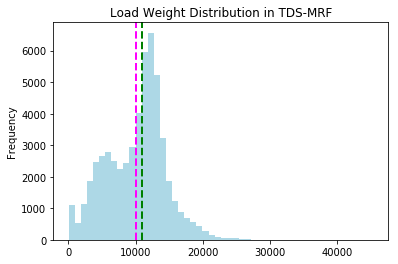

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats

df_TDSMRF = df[df['dropoff_site'] == 'TDS - MRF']

print('skewness: ', str(df_TDSMRF['load_weight'].skew()))
print('kurtosis: ', str(df_TDSMRF['load_weight'].kurt()))

df_TDSMRF['load_weight'].plot.hist(title='Load Weight Distribution in TDS-MRF', color='lightblue', bins=50)  
plt.axvline(df_TDSMRF['load_weight'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_TDSMRF['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Note: skewness -0.036 berada dalam range -0.5 sampai 0.5 sehingga data masih dapat diindikasikan sebagai normal distribution

sehingga yang digunakan untuk mendeteksi outliers adalah z value,limit = mean +/- 3std

Mencari standar deviation dan mengitung limit bawah dan atas outlier

In [22]:
df_std = df_TDSMRF.load_weight.std()
df_mean = df_TDSMRF.load_weight.mean()
lower = df_mean - 3*df_std
upper = df_mean + 3*df_std

print('std dev= ', df_std)
print('lower = ', df_mean, ' - 3 * ', df_std , ' = ', lower )
print('upper = ', df_mean, ' + 3 * ', df_std , ' = ', upper )

std dev=  4398.779244267707
lower =  10119.976800162936  - 3 *  4398.779244267707  =  -3076.3609326401856
upper =  10119.976800162936  + 3 *  4398.779244267707  =  23316.31453296606


In [23]:
outliers = df_TDSMRF[(df_TDSMRF['load_weight'] < lower) |
 (df_TDSMRF['load_weight'] > upper)]
print('outliers percentage: ', (outliers.load_weight.count()/df_TDSMRF.load_weight.count())*100, '%')

outliers percentage:  0.3425355033420356 %


Note: Jumlah outliers TDS-MRF hanya 0.34% dari total data, jumlah ini tidak signifikan

In [24]:
#drop outliers columns

df_TDSMRF_withoutoutliers = df_TDSMRF.copy()

for i in outliers.index:
    df_TDSMRF_withoutoutliers.drop(index = i, inplace= True)

In [25]:
import statistics

print('mean before : ', df_TDSMRF.load_weight.mean(), ' ; after :', df_TDSMRF_withoutoutliers.load_weight.mean())
print('median before : ', df_TDSMRF.load_weight.median(), ' ; after :', df_TDSMRF_withoutoutliers.load_weight.median())
print('modus before : ', statistics.mode(df_TDSMRF.load_weight), ' ; after :', statistics.mode(df_TDSMRF_withoutoutliers.load_weight))

mean before :  10119.976800162936  ; after : 10068.164053210463
median before :  10960.0  ; after : 10940.0
modus before :  12300.0  ; after : 12300.0


Note: Terjadi penurunan mean dan median dikarenakan pengurangan data akibat penghapusan data outlier, mengindikasikan bahwa outlier dominan atau seluruhnya bernilai positif

6. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

In [26]:
print('range: ', df_TDSMRF_withoutoutliers.load_weight.max(),'hingga', df_TDSMRF_withoutoutliers.load_weight.min())
print('variance: ', df_TDSMRF_withoutoutliers.load_weight.var())
print('standar deviasi: ', df_TDSMRF_withoutoutliers.load_weight.std())
print('mean: ', df_TDSMRF_withoutoutliers.load_weight.mean())

range:  23280.0 hingga 20.0
variance:  18615847.7156496
standar deviasi:  4314.608639917368
mean:  10068.164053210463


Site TDS - MRF setiap harinya menerima limbah dengan rata-rata limbah 10068 hingga 23010. Dengan jumlah limbah terendah yaitu 20 dan tertinggi yakni 232280.

7. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

In [32]:
confidence_interval = stats.norm.interval(0.95, df.load_weight.mean(), df.load_weight.std())
print('kapasitas site baru yaitu hingga: ', np.round(confidence_interval[1],decimals=2))

kapasitas site baru yaitu hingga:  16170.03


Kapasitas site baru yang disarankan yaitu sebesar 16170.03 dengan toleransi 5% dari keseluruhan entry load weight dapat berada diluar kapasitas yang disarankan.

8. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima).

Ho : Mu TDS_MRF = Mu nonTDS_MRF

H1 : Mu TDS_MRF > Mu nonTDS_MRF


In [39]:
print('nonTDSMRF: ', daily_nonTDSMRF.load_weight.mean())
print('TDSMRF   :',daily_TDSMRF.load_weight.mean())


nonTDSMRF:  5369.1193689475485
TDSMRF   : 10119.976800162936


Ho : Mu TDS_MRF = Mu 5369.12

H1 : Mu TDS_MRF > Mu 5369.12

Note: Mu TDS_MRF (10119.98) vs (5369.12) Mu TDS_MRF sudah terlihat perbedaan hingga 46% TDS_MRF, mari buktikan dengan hypothesis testing

In [41]:
daily_nonTDSMRF = df[df['dropoff_site'] != 'TDS - MRF']
daily_TDSMRF = df[df['dropoff_site'] == 'TDS - MRF']

t_stat,p_val = stats.ttest_1samp(daily_TDSMRF.load_weight, 5369.12)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)


P-value: 0.0
t-statistics: 250.999491185417


c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


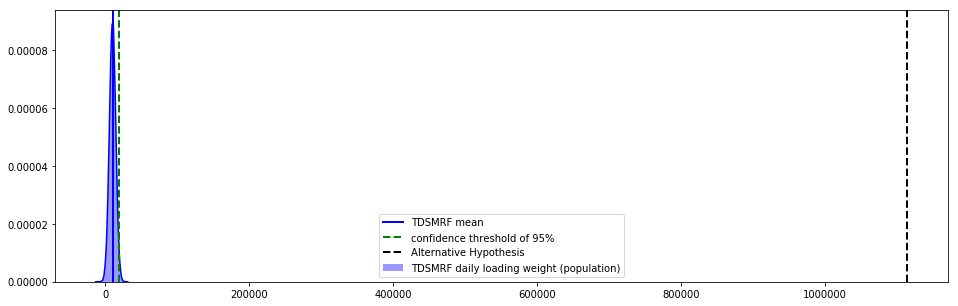

In [42]:
import seaborn as sns

TDSMRF_pop = np.random.normal(daily_TDSMRF.load_weight.mean(),daily_TDSMRF.load_weight.std(),150000)

ci = stats.norm.interval(0.95, daily_TDSMRF.load_weight.mean(), daily_TDSMRF.load_weight.std())

plt.figure(figsize=(16,5))
sns.distplot(TDSMRF_pop, label='TDSMRF daily loading weight (population)',color='blue')
plt.axvline(daily_TDSMRF.load_weight.mean(), color='blue', linewidth=2, label='TDSMRF mean')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(TDSMRF_pop.mean()+t_stat*TDSMRF_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

9. Tarik benang merah dan kesimpulan dari perhitungan dan analisa yang kamu telah lakukan di langkah-langkah sebelumnya. Ceritakan kesimpulanmu kepada pemerintah kota dan hindari bahasa teknis yang tidak dimengerti oleh orang yang bukan data scientist!

Dari analisa data yang dilakukan dapat diambil kesimpulan bahwa site TDS-MRF memiliki rata-rata lebih tinggi dibandingkan total load weight seluruh site lainnya. Hal ini mengindikasikan bahwa site TDS-MRF menanggung beban penampungan limbah lebih besar bahkan jika seluruh site lainnya ditotalkan. Apabila dilihat dari data yang ada rata-rata kapasitas maksimal perhari persitenya yaitu sebesar 16170, sedangkan TDS-MRF memiliki rata-rata 10068 hingga 23010 perharinya. Perhitungan ini semakin menjelaskan ketidak seimbangan alokasi limbah ke setiap sitenya, sehingga pemanfaatan site tidak maksimal. Pemerintah kota dapat berfokus ke pemerataan beban penampungan ini terlebih dahulu, kemudian melakukan pemantauan kembali untuk mengambil keputusan apakah perlu membuka site baru.

Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Apa perbedaan statistik deskriptif dan inferensial?

Statistik deskriptif digunakan untuk mendeskripsikan data, baik dari karakter data (central tendency, quartil and distribution and density) maupun grafik. Sedangkan inferensial bertujuan untuk mengambil kesimpulan akan suatu populasi dengan melakukan analisis  dan hipotesis testing dari sample.

2. Metrik pada central tendency apa yang tepat digunakan untuk menyimpulkan data yang terdistribusi normal dan tidak? Apakah sama atau berbeda?

Metrik mean dan median dapat digunakan untuk mengetahui apakah data terdistribusi normal atau tidak. Posisi dan jarak kedua metrik ini menentukan, dimana apabila berdekatan maka data terdistribusi normal. Namun apabila berjauhan, jika mean berada jauh di kiri median maka data left tailed skewed, jika mean jauh di kanan median maka data right tailed skewed.

3. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

Z-scores, dikarenakan data yang digunakan terdistribusi normal.

4. Apa konsep dibalik central tendency sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

Central tendency menjelaskan bahwa suatu populasi data memiliki kencenderungan berkisar atau berpusat pada titik rata-rata dan median. Oleh karena itu dengan kepercayaan 95% maka dapat dikatakan bahwa 95% data yang didapatkan akan berada disekitar rata-rata dengan kemungkinan 5% data berada diluar perhitungan/abnormal. Hal ini dapat digunakan untuk menghitung kapasitas (nomor 7) dikarenakan dengan central tendency dan perhitungan confidence interval kita dapat menghitung batas atas dan batas bawah dari 95% data yang akan didapatkan kedepannya, dapat dikatakan sebagai kita memperkirakan 95% data load weight perhari yang didapatkan oleh site baru dengan toleransi eror sebesar 5%.

5. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

Two sample independent, dikarenakan uji hipotesis ini membandingkan dua variable berbeda yang tidak saling berhubungan.

## Conclusions, Assumptions, Overall Analysis

Dari analisa data yang dilakukan didapati TDS-MRF memiliki jumlah total load_weight tertinggi, memiliki transaksi/hari terbanyak, termasuk 5 site dengan rata-rata tertinggi dan merupakan satu-satunya dari top 5 tersebut yang memiliki data yang banyak, dan 52.8% data load weight dari keseluruhan site pada  Austin Smart City ditampung oleh site ini. Lalu dilakukan hipothesis testing untuk membuktikan apakah TDS-MRF memiliki beban penampungan yang lebih tinggi dibanding site lainnya. Hasil uji hipotesis menghasilkan kesimpulan bahwa site TDS-MRF memiliki rata-rata lebih tinggi dibandingkan total load weight seluruh site lainnya. Apabila dilihat dari data yang ada rata-rata kapasitas maksimal perhari persitenya yaitu sebesar 16170, sedangkan TDS-MRF memiliki rata-rata 10068 hingga 23010 perharinya. Perhitungan ini semakin menjelaskan bahwa pemanfaatan site tidak maksimal. Pemerintah kota dapat berfokus ke pemerataan beban penampungan ini terlebih dahulu, kemudian melakukan pemantauan kembali untuk mengambil keputusan apakah perlu membuka site baru.